<a href="https://colab.research.google.com/github/DataEtnos/estudos_python/blob/main/Estudo_de_Outliers_no_data_set_de_vinhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install sidetable
!pip install pandas-profiling==3.3.0
!pip install --upgrade <package>


/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `pip install --upgrade <package>'


In [20]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sidetable
import pandas_profiling
import missingno as msno
from ipywidgets import interact, widgets

from sklearn import datasets

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sidetable
import pandas_profiling
import missingno as msno
from ipywidgets import interact, widgets

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

In [21]:
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    rc={
        'figure.figsize': (12,8)
    }
)

In [22]:
# Chamando um data frame

df,_ = datasets.load_wine(return_X_y=True, as_frame=True)
print(df.shape)
df.head()


(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


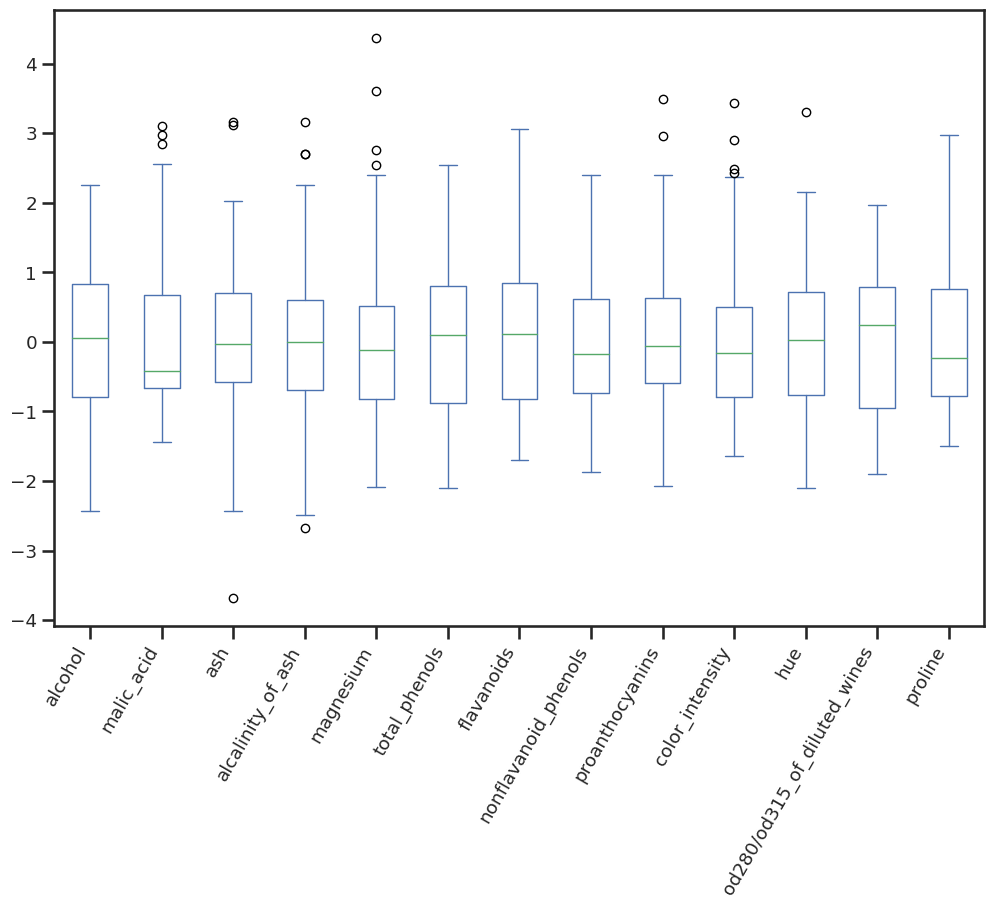

In [23]:
#Ajustando uma escala e padronizando a tabela de vinhos para conseguirmos plotar um grafico ajustado e verificar de forma mais acertiva os outliers de caracteristicas dos vinhos
df.apply(scale).plot.box()
plt.xticks(rotation=60, ha='right');


 A Formula que o plot.box identifica um out liers positivo e negativo e retirado pelo metodo do interquartil .



 Calculo do IQR : https://www.youtube.com/watch?v=SDdVz4zeN_c


##Interquartile range
Podemos identificar os outliers pelo método interquartil, utilizando a seguinte fórmula:

##lower_outlier=Q1−1.5×IQR

##upper_outlier=Q3+1.5×IQR

onde Q1 represente o primeiro quartil, Q3 o terceiro, e IQR o intervalo interquartil.

 ##IQR  = Q3-Q1


In [24]:
#Função que identifica outliers por linha , abrindo um leque para 3 (1.5 ou  3)
#Abre 3 o range para captar outliers extremo

def is_outlier(array, extreme=False):

  q1,q3 = np.quantile(array, [.25,.75])
  iqr = q3-q1

  factor = 3. if extreme else 1.5
  upper_outlier = q3 + factor*iqr
  lower_outlier = q1 - factor*iqr

  return (array < lower_outlier) | (array > upper_outlier)

In [25]:
#soma em um coluna para saber quantos temos em uma coluna
is_outlier(df.ash).sum()

3

In [26]:
#Assim desta forma trago todos os outliers das colunas do data set
df.apply(is_outlier).sum()

alcohol                         0
malic_acid                      3
ash                             3
alcalinity_of_ash               4
magnesium                       4
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 2
color_intensity                 4
hue                             1
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [27]:
# Removendo outliers
df[df.apply(is_outlier).any(axis=1)]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0
59,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0
69,12.21,1.19,1.75,16.8,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.0
73,12.99,1.67,2.60,30.0,139.0,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985.0
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0
95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0
110,11.46,3.74,1.82,19.5,107.0,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562.0
115,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0
121,11.56,2.05,3.23,28.5,119.0,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465.0
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0


In [28]:
# aqui vc puxa o que não é outliers  =  o ~ usado logo apos a chave e uma simbolo de negação assim  nega toda expressão
df[~df.apply(is_outlier).any(axis=1)]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


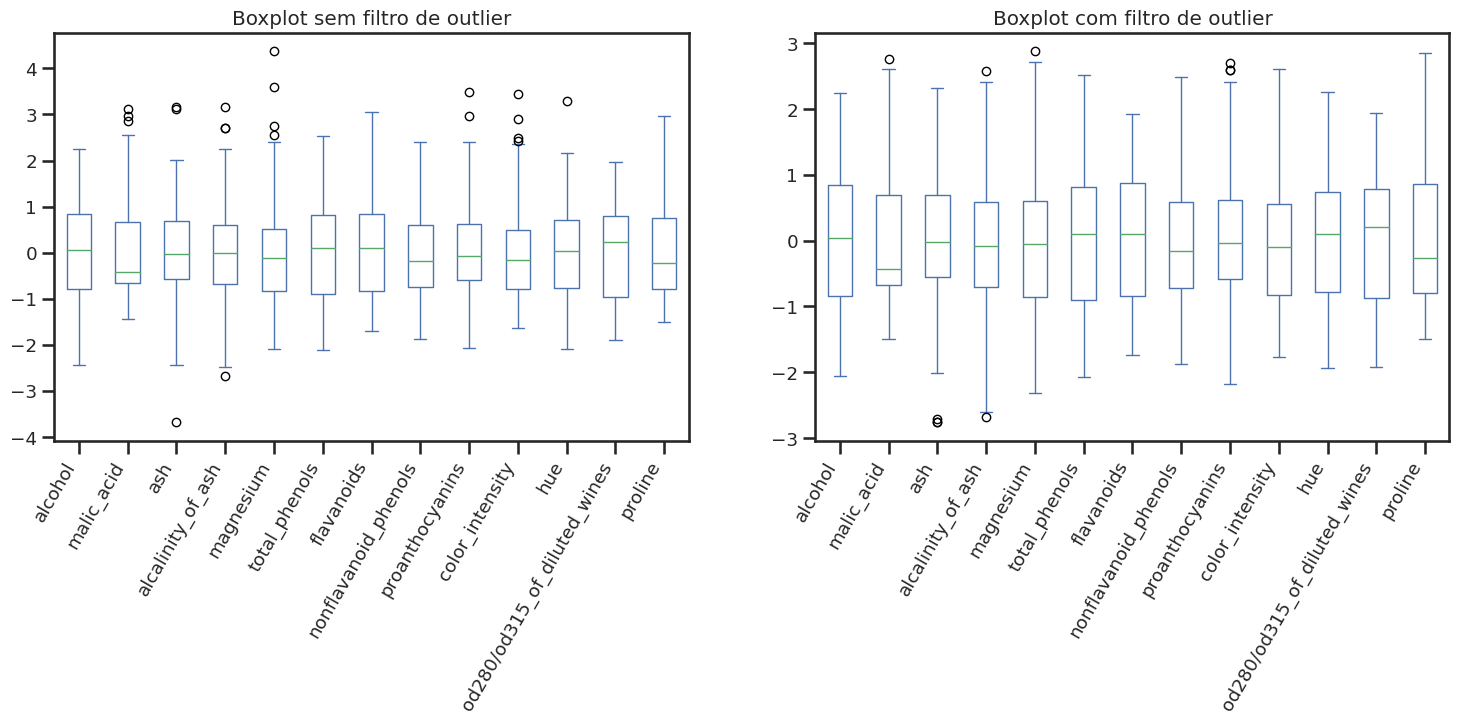

In [29]:
# Figura lado a lado dos dados originais e padronizados

#aqui esta definido o grafico  com os outliers esta dentro da df.without_outliers
df_without_outliers = df[~df.apply(is_outlier).any(axis=1)]

fig,axes = plt.subplots(ncols=2, figsize=(18,6))
#colocando os dois lado a lado
df.apply(scale).plot.box(ax=axes[0], title='Boxplot sem filtro de outlier')
df_without_outliers.apply(scale).plot.box(ax=axes[1], title='Boxplot com filtro de outlier')

#formatação do grafico
fig.autofmt_xdate(rotation=60, ha='right')
#chamando a figura
plt.show()

In [30]:
 # Mesmo appos aplicar o filto  noto que ainda assim existe outliers , isso  acontece por é feito novamente o calculo e assim mudado a distribuição dos dados
df_without_outliers.apply(is_outlier).sum()

alcohol                         0
malic_acid                      1
ash                             3
alcalinity_of_ash               2
magnesium                       1
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 3
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [31]:
#Metodo com z-score

#cria a array .
def zscore_outlier(array):
  #normalização
  scaled_array = scale(array)
  #comparação para saber se é maior ou menor que 3 ou -3
  return (scaled_array<-3) | (scaled_array>3)
#separando o z- score
df_without_outliers = df[~df.apply(zscore_outlier).any(axis=1)]

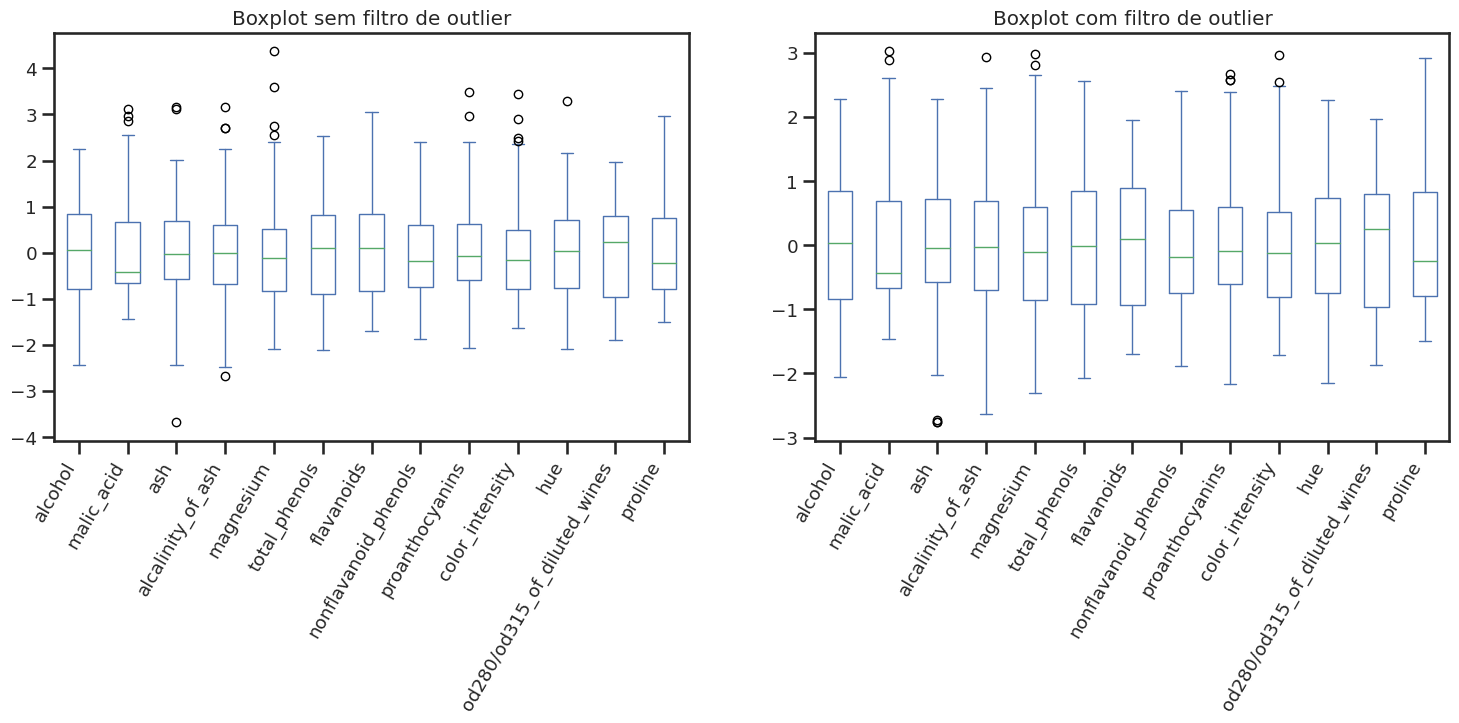

In [32]:
#Reapliucado a comparação após usar o metodo de z-score


fig,axes = plt.subplots(ncols=2, figsize=(18,6))

df.apply(scale).plot.box(ax=axes[0], title='Boxplot sem filtro de outlier')
df_without_outliers.apply(scale).plot.box(ax=axes[1], title='Boxplot com filtro de outlier')

fig.autofmt_xdate(rotation=60, ha='right')
plt.show()


## Técnicas para corrigir outliers
</h1><h2>Markup Cap</h2><ul><li>Consiste em limitar os outliers a valores máximos e mínimos aceitáveis</li><li>Ao invés de remover os outliers, seus valores são alterados</li><li>Critério:<ul><li>Definir percentis máximo e mínimo aceitáveis<ul><li>Ex: 90% e 99% -&gt; manter apenas valores dentro desses percentis</li></ul></li><li>Valores acima do máximo são reduzidos para o valor do percentil máximo</li><li>Valores abaixo do mínimo são aumentados para o valor do percentil mínimo</li></ul></li></ul><h2o</h2><ul><li><p>Função criada</p><ul><li>Recebe array e percentis mínimo e máximo</li><li>Filtra array, limitando valores conforme os percentis</li></ul></li><li><p>Aplicada em dataframe para corrigir outliers</p></li><li><p>Distribuição dos dados é modificada</p><ul><li>Mas outliers extremos são corrigidos</li></ul></li><li><p>Vantagens:</p><ul><li>Mantém outliers, em vez de removê-los</li><li>Pode definir critério customizado pelos percentis</li><li>Corrige distribuição</li></ul></li></ul>

In [39]:
# Mostrando percentis
df.describe(percentiles=[.01, .25, .50, .75, .90, .99])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
1%,11.440800,0.897700,1.700000,11.354000,78.000000,1.138500,0.470000,0.140000,0.420000,1.863200,0.547700,1.290000,306.940000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
90%,14.100000,3.983000,2.700000,24.000000,118.000000,3.044000,3.233000,0.530000,2.305000,8.530000,1.233000,3.456000,1261.500000
99%,14.472800,5.542200,2.989000,28.500000,141.760000,3.595900,3.791400,0.630000,3.033600,11.018500,1.426900,3.843000,1522.360000


In [34]:
#Esta função recebe o data set e trabalha com o percentil total sendo 0 minimo e  1(100) maximo
def cap_values(array, lower_quantile=0., upper_quantile=1.):
#aqui vc determina que a array não vai alterar os dados do original com .copy
  array = array.copy()


  lower_quantile = np.quantile(array, lower_quantile)
  upper_quantile = np.quantile(array, upper_quantile)

  array[array<lower_quantile] = lower_quantile
  array[array>upper_quantile] = upper_quantile

  return array

In [35]:
# Mostrando percentis após aplicar função
cap_values(df.ash, upper_quantile=.90).max()

2.7

In [38]:
#aplicando valores de cap e ve
df.apply(cap_values, upper_quantile=.99).describe(percentiles=[.01, .25, .5, .75, .9, .99])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.997054,2.334294,2.363865,19.486517,99.575955,2.292089,2.021252,0.361685,1.586445,5.042848,0.955729,2.610371,745.869213
std,0.804575,1.111002,0.267036,3.314706,13.680946,0.618829,0.979667,0.124067,0.559125,2.272948,0.223969,0.707571,312.129198
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
1%,11.440800,0.897700,1.700000,11.354000,78.000000,1.138500,0.470000,0.140000,0.420000,1.863200,0.547700,1.290000,306.940000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
90%,14.100000,3.983000,2.700000,24.000000,118.000000,3.044000,3.233000,0.530000,2.305000,8.530000,1.233000,3.456000,1261.500000
99%,14.409044,5.517406,2.935870,28.500000,139.634800,3.537457,3.759522,0.630000,2.976928,10.850255,1.421587,3.825290,1516.692800



##Transformação Logarítmica

A transformação logarítmica consiste em aplicar a função logaritmo nos valores dos dados. Isso comprime os valores mais extremos e expande os valores menores, resultando em uma distribuição mais normalizada.

Algumas vantagens da transformação log são:

Não remove nenhum dado, apenas altera a escala
Fácil de aplicar com funções pré-definidas como o numpy.log()
Reduz a presença e influência de outliers extremos
Para aplicar a transformação log nos dados, basta utilizar a função numpy.log():

import numpy as np# Aplica np.log em todos os valores da colunadf['coluna'] = df['coluna'].apply(np.log)
Após a transformação, os gráficos boxplot mostram menos outliers extremos em algumas colunas, embora alguns outliers persistam. A transformação log não elimina todos os outliers, mas reduz sua influência.

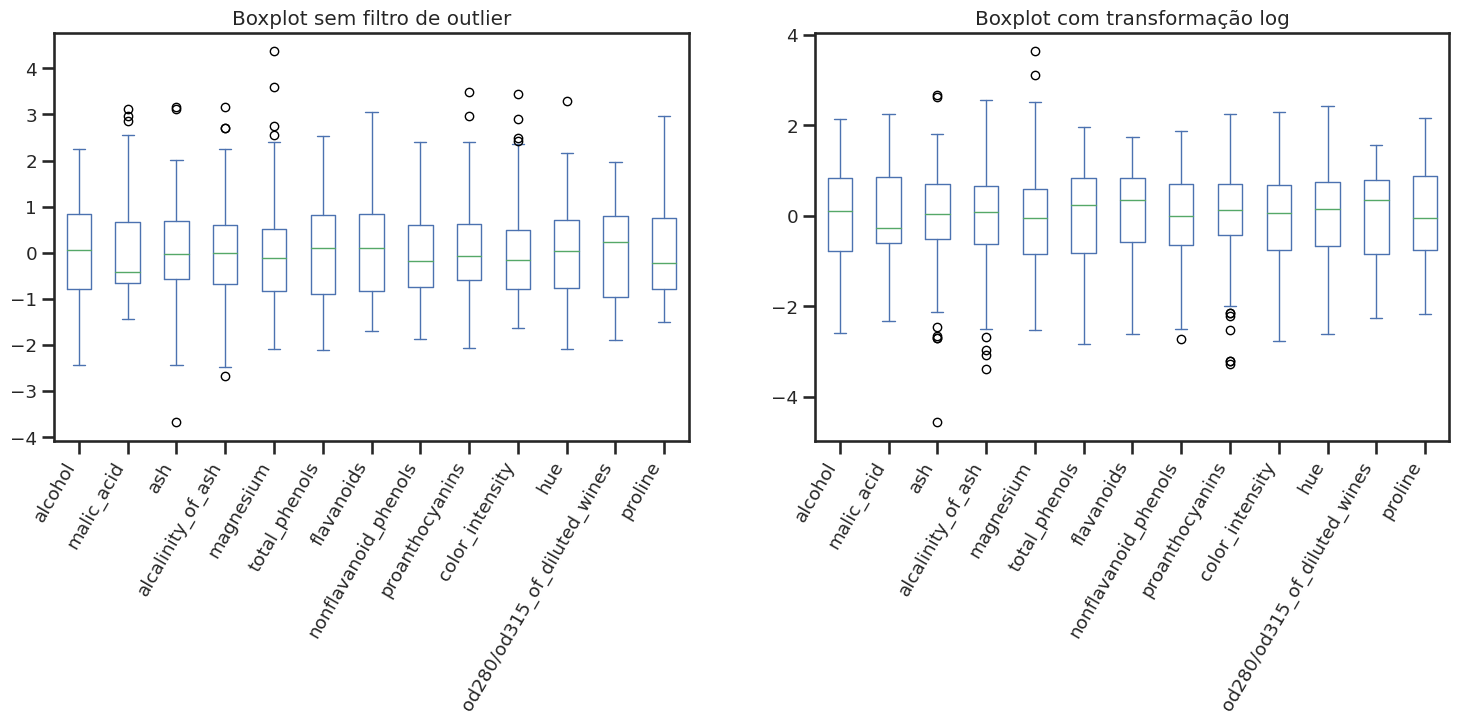

In [37]:
#Comparação do dataframe sem filtros de outliers e com tranformação log
fig,axes = plt.subplots(ncols=2, figsize=(18,6))

#df sem filtro de outliers
df.apply(scale).plot.box(ax=axes[0], title='Boxplot sem filtro de outlier')
#df com filtro de outliers no metodo LOG
df.apply(np.log).apply(scale).plot.box(ax=axes[1], title='Boxplot com transformação log')

fig.autofmt_xdate(rotation=60, ha='right')
plt.show()